# Estudo sobre viés e variância

Este notebook apresentará conceitos sobre viés e variância a fim de fixar o conteúdo associando teoria e prática.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error

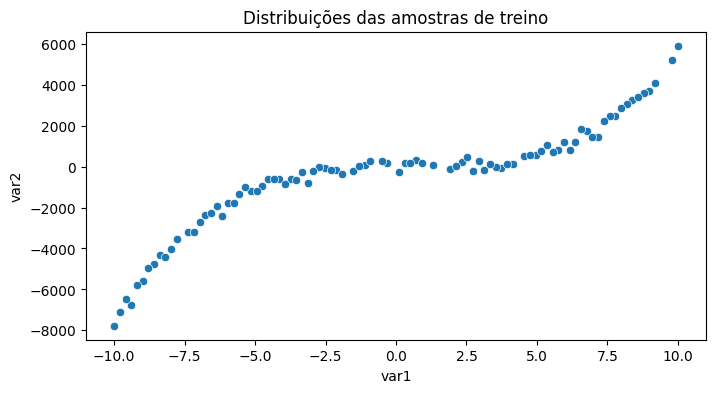

In [8]:
N = 100 # Número de amostras
train_sample = round(N * 0.9)
test_sample = round(N * 0.1)

def generate_dataframe(grau: int, population: int):
  x = np.linspace(-10, 10, N)
  coeficientes = np.random.uniform(-10, 10, grau + 1)
  y = sum(coeficientes[i] * x**i for i in range(grau + 1)) + np.random.normal(1, 200, population)

  data = pd.DataFrame({'var1': x, 'var2': y})
  return data

data = generate_dataframe(grau=3,
                          population= N)

# Amostras para treinamento
data = data.sample(frac=1).reset_index(drop=True)

data_train = data.iloc[:train_sample]
data_test = data.iloc[train_sample:train_sample + test_sample]

# Visualização dos dados
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data_train, x='var1', y='var2')
plt.xlabel('var1')
plt.ylabel('var2')
plt.title('Distribuições das amostras de treino')
plt.show()

# Bias
Viés, são erros por suposições extremamente simples do modelo. Modelos com alto viés podm ser subajustados, uma vez que não aprendem os padrões complexos dos dados de treinameto resultando em baixo desempenho tanto no treinamento quanto no teste.

**sintomas:**

1. Baixo desempenho em treino e em teste.


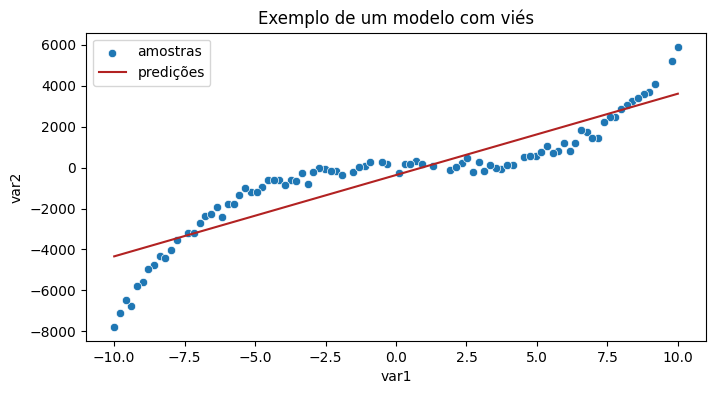

train RSME: 928.55
test RSME: 652.8


In [9]:
def predict_polinomial_regression(data, grau: int):

  X = data[['var1']]
  y = data[['var2']]

  pr = PolynomialFeatures(degree = grau)
  X_poly = pr.fit_transform(X)

  model = LinearRegression()
  model.fit(X_poly, y)
  y_poly_pred = model.predict(X_poly)
  return y_poly_pred

y_poly_train = predict_polinomial_regression(data=data_train, grau=1)
y_poly_test= predict_polinomial_regression(data= data_test, grau= 1)



sorted_idx = np.argsort(data_train['var1'])

# Visualização dos dados
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data_train, x='var1', y='var2', label='amostras')
plt.plot(data_train['var1'].values[sorted_idx], y_poly_train[sorted_idx], color='firebrick', label='predições')
plt.xlabel('var1')
plt.ylabel('var2')
plt.title('Exemplo de um modelo com viés')
plt.legend()
plt.show()


print(f"train RSME: {round(mean_absolute_error(y_poly_train, data_train['var2']),2)}")
print(f"test RSME: {round(mean_absolute_error(y_poly_test, data_test['var2']),2)}")

A fim de diminuir o viés, podemos:
1. aumentar a complexidade do modelo.
2. adicionar variáveis.
3. Boosting

Assim, iremos aumentar a complexidade do modelo, aumentando o grau do polinômio para 4 e veremos o que acontece com a métrica.

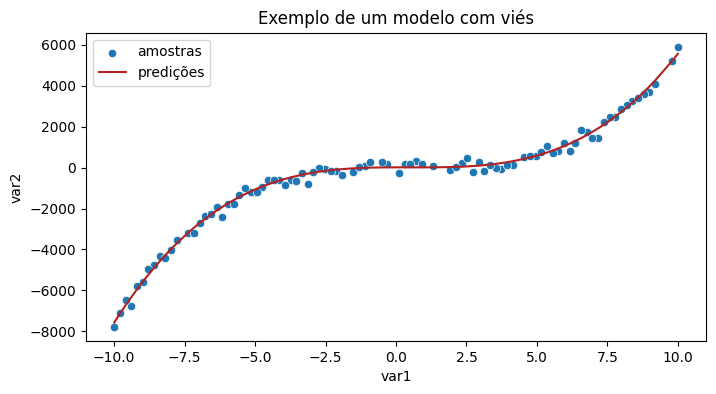

train RSME: 170.48
test RSME: 114.22


In [10]:
GRAU = 3
y_poly_train = predict_polinomial_regression(data=data_train, grau= GRAU)
y_poly_test= predict_polinomial_regression(data= data_test, grau= GRAU)



sorted_idx = np.argsort(data_train['var1'])

# Visualização dos dados
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data_train, x='var1', y='var2', label='amostras')
plt.plot(data_train['var1'].values[sorted_idx], y_poly_train[sorted_idx], color='firebrick', label='predições')
plt.xlabel('var1')
plt.ylabel('var2')
plt.title('Exemplo de um modelo com viés')
plt.legend()
plt.show()


print(f"train RSME: {round(mean_absolute_error(y_poly_train, data_train['var2']),2)}")
print(f"test RSME: {round(mean_absolute_error(y_poly_test, data_test['var2']),2)}")

Podemos ver que o RMSE melhora tanto em treino como em teste com o aumento da complexidade do modelo. Reduzindo o viés. Mas, e se aumentáseemos muito a complexidade do modelo?

# Variância

A variância é o erro pela capacidade de sobreajustar os dados. O modelo aprende cada ruido do modelo e se adequa tanto aos dados que consegue performar muito bem em treino, mas não consegue performar no teste:

1. Alto desempenho no treino e baixo desempenho no teste

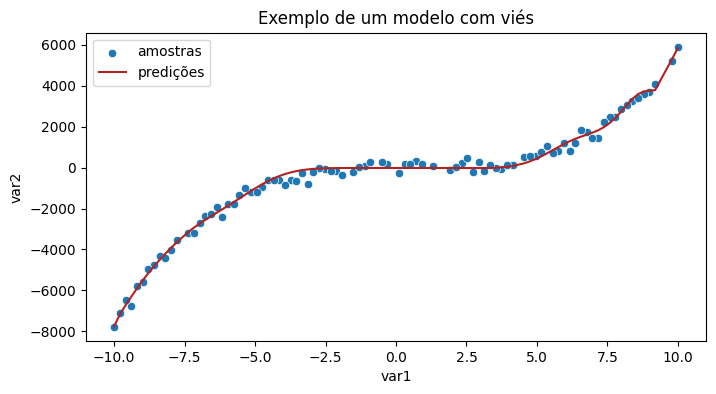

train RSME: 188.45
test RSME: 49.94


In [11]:
y_poly_train = predict_polinomial_regression(data=data_train, grau=20)
y_poly_test= predict_polinomial_regression(data= data_test, grau= 20)



sorted_idx = np.argsort(data_train['var1'])

# Visualização dos dados
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data_train, x='var1', y='var2', label='amostras')
plt.plot(data_train['var1'].values[sorted_idx], y_poly_train[sorted_idx], color='firebrick', label='predições')
plt.xlabel('var1')
plt.ylabel('var2')
plt.title('Exemplo de um modelo com viés')
plt.legend()
plt.show()


print(f"train RSME: {round(mean_absolute_error(y_poly_train, data_train['var2']),2)}")
print(f"test RSME: {round(mean_absolute_error(y_poly_test, data_test['var2']),2)}")